# LABORATOIRE 5
## GCH/MAT 217, Automne 2020, V. Charette

## RAPPELS Discrétisation de la dérivée première

Rappelons que l'expansion de Taylor nous dit : 
$$f(x_0+\Delta x)  = f(x_0)+\Delta x f'(x_0)+ \frac{(\Delta x)^2}{2}f''(x_1),\quad x_1\in \left[x_0,x_0+\Delta x\right]$$

Ainsi, on obtient une expression pour $f'(x_0)$ en termes de valeurs autour de $x_0$.
$$f'(x_0)=\frac{1}{\Delta x}(f(x_0+\Delta x)-f(x_0))+E$$
où $E$ est le terme d'erreur, proportionnel à $(\Delta x)^2$.

Voici une autre approche, en considérant les deux côtés de $x_0$.
$$
\begin{align*}
f(x_0+\Delta x) & = f(x_0)+\Delta x f'(x_0)+ \frac{(\Delta x)^2}{2}f''(x_1),\quad x_1\in [x_0,x_0+\Delta x] \\
f(x_0-\Delta x) & = f(x_0)-\Delta x f'(x_0)+ \frac{(\Delta x)^2}{2}f''(x_2),\quad x_2\in [x_0-\Delta x,x_0]
\end{align*}
$$
En soustrayant la deuxième de la première, on obtient une autre expression pour $f'(x_0)$:
$$f'(x_0)=\frac{1}{2\Delta x}(f(x_0+\Delta x)-f(x_0-\Delta x))+E$$
où $E$ est le terme d'erreur, proportionnel à $(\Delta x)^2$.  Lorsque $(\Delta x)^2$ est suffisamment petit, on obtient une bonne approximation pour la valeur de la dérivée première, en termes des valeurs voisines.

## Discrétisation de la dérivée seconde
$$
\begin{align*}
f(x_0+\Delta x) & = f(x_0)+\Delta x f'(x_0)+ \frac{(\Delta x)^2}{2}f''(x_0)+\frac{(\Delta x)^3}{6}f^{(3)}(x_1),\quad x_1\in [x_0,x_0+\Delta x] \\
f(x_0-\Delta x) & = f(x_0)-\Delta x f'(x_0)+ \frac{(\Delta x)^2}{2}f''(x_0)+\frac{(\Delta x)^3}{6}f^{(3)}(x_2),\quad x_2\in [x_0-\Delta x,x_0]
\end{align*}
$$
Maintenant on additionne pour obtenir une expression pour $f''(x_0)$ :
$$f''(x_0)=\frac{1}{(\Delta x)^2}(f(x_0-\Delta x)-2f(x_0)+f(x_0+\Delta x))+E$$
où $E$ est le terme d'erreur, proportionnel à $(\Delta x)^3$.

On va discrétiser l'équation de la chaleur :
$$u_t=\alpha u_{xx}$$
En remplaçant par les expressions développées en haut :
$$
\begin{align*}
\frac{1}{\Delta t}(u(x_0,t_0+\Delta t)-u(x_0,t_0)) & = \frac{\alpha}{(\Delta x)^2}(u(x_0-\Delta x,t_0)-2u(x_0,t_0)+u(x_0+\Delta x,t_0)) \\
u(x_0,t_0+\Delta t) & = u(x_0,t_0) +\frac{\alpha\Delta t}{(\Delta x)^2}(u(x_0-\Delta x,t_0)-2u(x_0,t_0)+u(x_0+\Delta x,t_0))
\end{align*}
$$

On écrit $u$ comme une matrice, où chaque rangée correspond à une valeur de $x$ et chaque colonne correspond à une valeur de $t$.  La condition précédente devient alors : 
$$u(k,j)  = u(k,j-1) +\frac{\alpha\Delta t}{(\Delta x)^2}(u(k-1,j-1)-2u(k,j)+u(k+1,j))$$

## Application : équation de la chaleur dans un cylindre, avec convection à la surface.

On va supposer que le profil de température est symétrique autour de l'axe du cylindre, c'est-à-dire $\frac{\partial u}{\partial\theta}=0$.  Ainsi, la température sera une fonction $u(r,z,t)$. 

Voici l'équation de la chaleur en coordonnées cylindriques $(r,z)$:

$$\frac{\partial}{\partial t}u=\frac{k}{\rho C_p}\left(\frac{1}{r}\frac{\partial}{\partial r}\left(r\frac{\partial}{\partial r}u\right)+\frac{\partial^2}{\partial z^2}u\right),\quad 0<r<R,\quad 0<z<Z$$

On va l'écrire plutôt comme suit : 

$$\frac{\partial}{\partial t}u=\frac{k}{\rho C_p}\left(\frac{1}{r}\frac{\partial}{\partial r}u+\frac{\partial^2}{\partial r^2}u+\frac{\partial^2}{\partial z^2}u\right),\quad 0<r<R,\quad 0<z<Z$$

Le cylindre est réchauffé par convection à sa surface : 

\begin{align*}
\frac{\partial}{\partial z}u(r,0)& = -\frac{h}{k}(u-u_{\infty}) \\
\frac{\partial}{\partial z}u(r,Z)& = \frac{h}{k}(u-u_{\infty}) \\
\frac{\partial}{\partial r}u(R,z)& = \frac{h}{k}(u-u_{\infty})
\end{align*}
où $u_{\infty}$ est la température ambiante.

Enfin, puisque $r=0$ correspond à l'axe de symétrie du cylindre : 
$$\frac{\partial}{\partial r}u(0,z) = 0 $$

Commençons par la discrétisation de l'EDP.

\begin{align*}
\frac{1}{\Delta t}(u(r_0,z_0,t_0+\Delta t)-u(r_0,z_0,t_0)) & =
\frac{k}{\rho C_p}(
\frac{1}{2r_0\Delta r}(u(r_0+\Delta r,z_0,t_0)-u(r_0-\Delta r,z_0,t_0))\\
& +
\frac{1}{(\Delta r)^2}(u(r_0-\Delta r,z_0,t_0)-2u(r_0,z_0,t_0)+u(r_0+\Delta r,z_0,t_0)) \\
& +
\frac{1}{(\Delta z)^2}(u(r_0,z_0-\Delta z,t_0)-2u(r_0,z_0,t_0)+u(r_0,z_0+\Delta z,t_0)) 
)\\
u(r_0,z_0,t_0+\Delta t) & = 
C_1\left(-\frac{1}{2r_0\Delta r}+\frac{1}{(\Delta r)^2}\right) u(r_0-\Delta r,z_0,t_0)\\
& + 
C_1\left(\frac{1}{2r_0\Delta r}+\frac{1}{(\Delta r)^2}\right) u(r_0+\Delta r,z_0,t_0)\\
& +
C_1\left(\frac{1}{(\Delta z)^2}\right) u(r_0,z_0-\Delta z,t_0) \\
& + 
C_1\left(\frac{1}{(\Delta z)^2}\right) u(r_0,z_0+\Delta z,t_0)\\
& + 
\left(1+\frac{-2C_1}{(\Delta r)^2}+\frac{-2C_1}{(\Delta z)^2} \right)u(r_0,z_0,t_0)
\end{align*}

où 
$$C_1=\frac{k\Delta t}{\rho C_p}$$

Discutons maintenant des conditions au bord.  En fait, nous parlons ici de la première condition :

$$\frac{\partial}{\partial z}u(r,0) = -\frac{h}{k}(u-u_{\infty})$$
les autres sont discrétisées de manière semblable.

\begin{align*}
\frac{1}{\Delta z}(u(r_0,z_0+\Delta z,t_0)-u(r_0,z_0,t_0) & = -\frac{h}{k}(u(r_0,z_0,t_0)-u_{\infty}) \\
\left(\frac{h\Delta z}{k}-1 \right)u(r_0,z_0,t_0) & = -u(r_0,z_0+\Delta z,t_0)+\frac{h}{k}u_{\infty} \\
u(r_0,z_0,t_0) & =\frac{1}{1-\frac{h\Delta z}{k}}\left(
u(r_0,z_0+\Delta z,t_0)-\frac{h}{k}u_{\infty}\right)
\end{align*}


In [1]:
#code emprunté de Marc Lebreux, via Yannick Poulin-Giroux

import numpy as np
import matplotlib.pyplot as plt
#from numba import jit

# Ce code contient l'algorithme et le post-processing nécessaire à la simulation
# du transfert de chaleur 2D (r et z) transitoire en coordonnées cylindriques 
# dans une tige. Le cylindre est refroidi/chauffé par convection aux limites.
# 


# Algorithme de différences finies
#@jit
def cylindre_convection(dr,dz,R,Z,dt,N):
    
    r=np.arange(0,R+dr,dr) #vecteur r 
    z=np.arange(0,Z+dz,dz) #vecteur z
    nr=len(r)
    nz=len(z)
    
    t=np.arange(0,N*dt+dt,dt) #vecteur temps t
    nt=len(t) #nombre de points dans le vecteur t
    
    Tinf=100. #degC
#    Tinf=373.2 #K
    h=1000. #W/m^2.K
    
    Tinitial=20. #degC, condition initiale
#    Tinitial=293.2 #K, condition initiale
    T=np.zeros([nr,nz])+Tinitial  #condition initiale 
    TT=np.zeros([nr,nz,nt])
    TT[:,:,0]=T
    
    rho=1200 #kg/m^3
    Cp=3390 #J/kg.K
    k=0.55 #W/m.K    
    C1=k*dt/(rho*Cp) 
    

    for tt in range (1,nt):
        T0=T.copy()
        for i in np.arange (1,nr-1):
            for j in np.arange (1,nz-1):
                
                # Coefficients de l'équation discrétisée
                a=C1*(1./dr**2-1/(2*r[i]*dr))
                b=C1*(1./dr**2+1/(2*r[i]*dr))
                c=C1*(1./dz**2)
                d=C1*(1./dz**2)
                e=(1.-2.*C1/dr**2-2.*C1/dz**2)
                
                # Équation discrétisée 
                T[i,j]=a*T0[i-1,j]+b*T0[i+1,j]+c*T0[i,j-1]+d*T0[i,j+1]+e*T0[i,j]  # méthode explicite
                

        T[:,0]=(T[:,1]-h*dz/k*Tinf)/(1-h*dz/k)  # conditions au bord à z=0, convection 
        T[:,nz-1]=(T[:,nz-2]+h*dz/k*Tinf)/(1+h*dz/k)   # conditions au bord à z=Z, convection 
        T[nr-1,:]=(T[nr-2,:]+h*dr/k*Tinf)/(1+h*dr/k)  # conditions au bord à r=R , convection  
        T[0,:]=T[1,:] # conditions au bord à r=0, symétrie adiabatique
        
        TT[:,:,tt]=T 
       
    return(r,z,t,TT)
    



In [6]:
dz=0.001 #m
dr=0.001 #m
R=0.05 #m
Z=0.1 #m
dt=1 #s
N=3000  # nb de pas de temps

(r,z,t,TT)=cylindre_convection(dr,dz,R,Z,dt,N)



In [7]:
TT[0,round(len(z)/2),:]

array([20.        , 20.        , 20.        , ..., 57.55395283,
       57.57124821, 57.58853818])

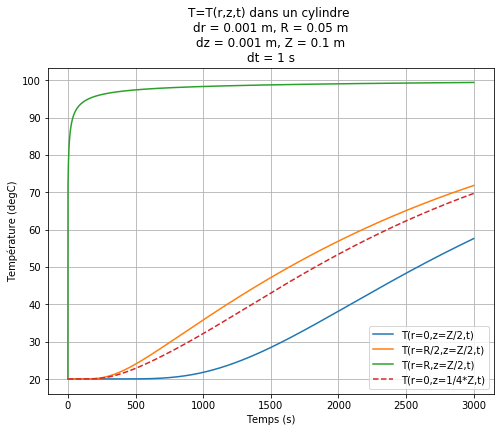

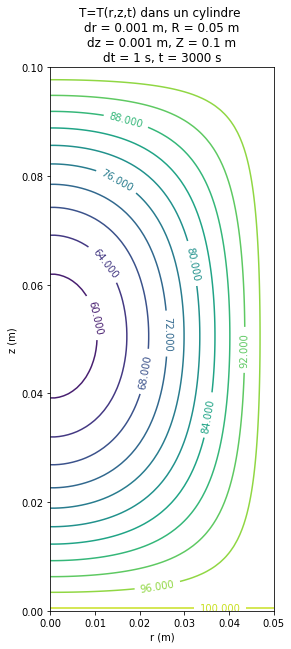

In [8]:
# Tout le reste n'est que du code pour visualiser les résultats

Tr0=TT[0,round(len(z)/2),:]
Tr05R=TT[round(len(r)/2),round(len(z)/2),:]
TrR=TT[-1,round(len(z)/2),:]
Tz025Z=TT[0,round(1/4*len(z)),:]

plt.figure(figsize=(8,6))
plt.plot(t,Tr0,t,Tr05R,t,TrR,t,Tz025Z,'--')
plt.xlabel('Temps (s)')
plt.ylabel('Température (degC)')
plt.grid(True)
t1='T=T(r,z,t) dans un cylindre \ndr = '+str(dr)+' m, R = '+str(R)+' m'
t2=t1+'\ndz = '+str(dz)+' m, Z = '+str(Z)+' m'
t3=t2+'\ndt = '+str(dt)+' s'
plt.title(t3)
plt.legend(['T(r=0,z=Z/2,t)','T(r=R/2,z=Z/2,t)','T(r=R,z=Z/2,t)','T(r=0,z=1/4*Z,t)'],loc=4)
#plt.savefig("cylindre_2.png", bbox_inches='tight')



iii=3000
nb_cont=10
plt.figure(figsize=(4,10))
plt.xlabel('r (m)')
plt.ylabel('z (m)')
t1='T=T(r,z,t) dans un cylindre \ndr = '+str(dr)+' m, R = '+str(R)+' m'
t2=t1+'\ndz = '+str(dz)+' m, Z = '+str(Z)+' m'
t3=t2+'\ndt = '+str(dt)+' s, t = '+str(t[iii])+' s'
plt.title(t3)
#for iii in range(0,len(t)):
CS=plt.contour(r,z,np.transpose(TT[:,:,iii]),nb_cont)
plt.clabel(CS, inline=1, fontsize=10)
#plt.savefig("cylindre_1.png", bbox_inches='tight')

plt.show()

## Exercice.
Combien de secondes prendra-t-on pour que le centre du cylindre, c'est-à-dire le point $r=0$, $z=Z/2$, atteigne une température de 50 degrés Celsius?